<footer id="footer"></footer>

<p style="align: center;"><img align=center src="https://i.ibb.co/6bWrQPS/213.jpg"/></p>

<h2 style="text-align: center;"><b>EVRAZ AI challenge</b></h2>

<h4 style="text-align: center;"><b>Команда: EVRAZ Promising</b></h4>

**Состав команды:**  

- Сергей Земсков (капитан)
- Милана Шишко
- Артём Соломко
- Александр Миндеров


---
    
 <font size="1"> Примечание: ИЗМЕНИТЕ РАБОТУ МЕЖДУНАРОДНОЙ
ГОРНО-МЕТАЛЛУРГИЧЕСКОЙ КОМПАНИИ С ПОМОЩЬЮ DATA SCIENCE </font>












Конекст:  

При производстве стали чугун "продувается" кислородом для удаления примесей. Этот процесс идёт в среднем 15-25 минут при температуре около 1600 градусов. За процессом следит машинист дистрибутора, который на основе своего опыта и специальных знаний определяет момент, когда процесс продувки нужно остановить. В процессе продувки металл насыщается кислородом, а его температура увеличивается. Если "передуть" чугун – сгорит больше металла и на выходе будет меньше стали, что приведет к потере прибыли, если "недодуть", то марка стали не будет удовлетворять заданным критериям и нужно будет "додувать", что замедляет производительность цеха.

Вам предстоит разработать алгоритм прогнозирования параметров чугуна – что может стать отличным помощником для машиниста и существенно улучшить производство ЕВРАЗа

- **produv** – Таблица содержит основные параметры продувки - мгновенный расход кислорода и положение (наклон) фурмы
- **lom** – Вместе с чугуном в фурму засыпают лом - это часть технологического процесса. Таблица содержит вес и тип ломов, использованных в каждой плавке
- **plavki** – Основная информация по плавке - характеристики плавки (марка металла, направление разливки) и оборудования
- **sip** – Сыпучие добавки, используемые в технологическом процессе
- **chronom** – хронометраж - время начала и конца различных операций во время плавки
- **chugun** – Химический состав и характеристики чугуна
- **gas** – Информация об анализе отходящих газов
- **target** – целевые значения

```
def metric(answers, user_csv):

    delta_c = np.abs(np.array(answers['C']) - np.array(user_csv['C']))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers['TST']) - np.array(user_csv['TST']))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers['C'])

    return np.sum(hit_rate_c + hit_rate_t) / 2 / N
    
```

## Атрибутный состав данных

1. `produv`: содержит основные параметры продувки - мгновенный расход кислорода и   положение (наклон) фурмы

```
NPLV	номер плавки
SEC	время измерения
RAS	расход кислорода на продувку
POL	положение фурмы для продувки

```

2. `lom`:  лом - это часть технологического процесса. Таблица содержит вес и тип ломов, использованных в каждой плавке

```
NPLV	номер плавки
VDL	код лома
NML	наименование лома
VES	вес лома

```

3. `plavki`: Основная информация по плавке -   характеристики плавки (марка металла, направление разливки) и обородувания

```
NPLV	номер плавки
plavka_VR_NACH	время начала плавки
plavka_VR_KON	время окончания плавки
plavka_NMZ	марка заданная 
plavka_NAPR_ZAD	направление разливки
plavka_STFUT	стойкость футеровки конвертера
plavka_TIPE_FUR	тип фурмы
plavka_ST_FURM	стойкость фурмы
plavka_TIPE_GOL	тип головки фурмы
plavka_ST_GOL	стойкость головки фурмы
```

4. `sip`: Сыпучие добавки, используемые в технологическом процессе

```
NPLV	номер плавки
VDSYP	вид сыпучих
NMSYP	наименование сыпучих
VSSYP	вес сыпучих
DAT_OTD	дата и время отдачи
```

5. `chronom`: хронометраж - время начала и конца различных операций во время плавки

```
NPLV	номер плавки
TYPE_OPER	тип операции
NOP	наименование операции
VR_NACH	время начала операции
VR_KON	время окончания операции
O2	количество кислорода, израсходованное на операцию
```

6. `chugun`: Химический состав и характеристики чугуна

```
NPLV	номер плавки
VES	вес чугуна
T	температура чугуна
SI	SI вчугуне
MN	MN в чугуне
S	S в чугуне
P	P в чугуне
CR	CR в чугуне
NI	NI в чугуне
CU	CU в чугуне
DATA_ZAMERA	дата и время замера хим. состава чугуна
TI	TI в чугуне
V	V в чугуне
```

7. `gas`: Информация об анализе отходящих
  газов

```
O2_pressure	Давление кислорода
T фурмы 2	Температура 2-ой фурмы
T фурмы 1	Температура 1-ой фурмы
AR	доля AR в отх. газах 
CO	доля CO в отх. газах 
CO2	доля CO2 в отх. газах 
H2	доля H2 в отх. газах 
N2	доля N2 в отх. газах 
O2	доля O2 в отх. газах 
T	температура отходящих газов
V	объем выходящих газов
NPLV	номер плавки
Time	дата и время замера хим. состава отходящих газов
```

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

## Импорт библиотек и данных

In [ ]:
%%capture
!pip install optuna

In [ ]:
%%capture
!pip install phik

In [ ]:
%%capture
!pip install catalyst

In [ ]:
%%capture
!pip install catboost

In [ ]:
%%capture
!pip install category-encoders

In [ ]:
%%capture
!pip install shap

In [ ]:
import pandas as pd
import numpy as np 
import pylab
import scipy.stats as stats
import warnings
import optuna
import hyperopt


import pickle
import phik
from phik.report import plot_correlation_matrix
from phik import report
from category_encoders import MEstimateEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR
import shap
from sklearn.utils import class_weight, shuffle
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from xgboost import XGBRegressor


from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from catboost import Pool
from catboost import CatBoostRegressor
from google.colab import files

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
np.random.seed(42)

%matplotlib inline

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

Исследовательский анализ данных проводили в другом ноутбуке. Ниже представлено решение задачи по предсказанию двух целевых переменных - Температура и содержание углерода

[EDA капитана](https://colab.research.google.com/drive/1OJfzasyatVWl4Dw3UlEghEMwfXRPQf7n)

### Сбор сета

Для начала подготовим обучающую выборку. Далее составит функции для ускорения обработки - в разделе Pipiline

#### Подготовка обучающей выборки

In [ ]:
class FeatureSelection (BaseEstimator, TransformerMixin):


  def __init__(self, estimator, n_features_to_select=None, columns=None):
    self.estimator = estimator
    self.n_features_to_select = n_features_to_select
    self.columns = columns

  def fit(self, X, y, **fit_params):
    # разделить выборку на обучение и валидацию
    X_train, self.X_val, y_train, y_val = train_test_split(
                                      X, y, test_size=.25, random_state=42)
    
    assert X_train.shape[0] + self.X_val.shape[0] == X.shape[0], 'Неправильно разделена выборка'
    # обучить модель
    self.estimator.fit(X_train, y_train, eval_set = [(self.X_val, y_val)],
                       early_stopping_rounds = 200
                       , use_best_model=True)

    # получаем предсказание веростности классов
    self.fi = (pd.DataFrame({'feature': list(X_train.columns), 
                    'importance': self.estimator.feature_importances_})
    .sort_values(by='importance', ascending=False))
    self.fi.sort_values(by=['importance'],ascending=False,inplace=True)
    self.idx = list(self.fi['importance'].index)[:self.n_features_to_select]
    # собираем сет данных
   

    return self

  def transform(self, X, y=None):
    X_selected = X.iloc[:, self.idx]
    return X_selected

  def get_index(self):
    return self.idx

In [ ]:
sample_sub = pd.read_csv('/content/sample_submission.csv')

produv_train = pd.read_csv('/content/data_task1/produv_train.csv', index_col=0)
lom_train = pd.read_csv('/content/data_task1/lom_train.csv')
plavki = pd.read_csv('/content/data_task1/plavki_train.csv', index_col=0)
sip_train = pd.read_csv('/content/data_task1/sip_train.csv')
chronom_train = pd.read_csv('/content/data_task1/chronom_train.csv', index_col=0)
chugun_train = pd.read_csv('/content/data_task1/chugun_train.csv', index_col=0)
gas_train = pd.read_csv('/content/data_task1/gas_train.csv', index_col=0)
target_train = pd.read_csv('/content/data_task1/target_train.csv', index_col=0)

Необходимо собрать готовый сет. Для этого, из данных про хноронометражу выделяем процесс Продувки, находим время продувки в секундах. Также обозначим дату завершения продувки и по ней агрегируем газы и плавки (содержание газов и химических элементов).

Лом агрегируем по компонентам. Из плавок удаляем аномалии в виде повторов номера плавки, сыпучие добавки сагрегируем по компонентам

In [ ]:
# обработка лома и сип https://github.com/waico/evraz-hack/blob/main/FinalSubmission.ipynb


chron = chronom_train[chronom_train['NOP'] =='Продувка']

cols = ['VR_NACH', 'VR_KON']

for col in cols: 
  chron[col] = pd.to_datetime(chron[col], format="%Y-%m-%d %H:%M:%S")
chron['produv_time'] = (chron['VR_KON'] - chron['VR_NACH'])/ np.timedelta64(1, 's')
chron = chron.drop('O2', axis=1)
chron['End'] = chron['VR_KON'].dt.floor('Min')


end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()

gas_train['Time'] = pd.to_datetime(gas_train['Time'], format="%Y-%m-%d %H:%M:%S")
gas_train['Oper'] = gas_train['Time'].dt.floor('Min')
gas_train = gas_train.reset_index()
gas_train.merge(end_time, on='NPLV', how='left').head()


gas_aggregated = end_time.apply(
    lambda x: gas_train[
        np.logical_and(
            gas_train['Oper'] <= x['End'], gas_train['NPLV'] == x['NPLV']
        )
    ].agg(
        {
            'Oper': 'max',
            'NPLV': 'max',
            'V': 'sum',
            'T':'sum',
            'AR':'sum',
            'O2': 'sum',
            'N2': 'sum',
            'H2': 'sum',
            'CO2': 'sum',
            'CO': 'sum',
            'T фурмы 1': 'sum',
            'T фурмы 2': 'sum',
            'O2_pressure': 'sum',
         

        }
    ),
    axis=1,
).sort_values(by=['Oper', 'NPLV'])
gas_aggregated_train = gas_aggregated.drop('Oper', axis=1)


lom_train = lom_train.drop(columns='NML')
lom_train = (pd.pivot(lom_train, index='NPLV', columns='VDL', values='VES')
.fillna(0).astype(int)
.add_prefix('lom_VES_VLD'))
lom_train['lom_components'] = lom_train.apply(lambda x: (x > 0).sum(), axis=1)

df_lom_train = (lom_train[[x for x in lom_train.columns if x.startswith('lom_VES_VLD')]]
                                           .apply(lambda x: x.sum(), axis=1)
                                           )
df_plavki_train = plavki[~plavki.index.duplicated(keep='first')]

df_plavki_train = df_plavki_train.drop(['plavka_VR_NACH', 'plavka_VR_KON'], axis=1)

produv_train['SEC'] = pd.to_datetime(produv_train['SEC'], format="%Y-%m-%d %H:%M:%S")
produv_train['Oper_sec'] = produv_train['SEC'].dt.floor('Min')
produv_train = produv_train.reset_index()
produv_train.merge(end_time, on='NPLV', how='left').head()


produv_train_aggregated = end_time.apply(
    lambda x: produv_train[
        np.logical_and(
            produv_train['Oper_sec'] <= x['End'], produv_train['NPLV'] == x['NPLV']
        )
    ].agg(
        {
            'Oper_sec': 'max',
            'NPLV': 'max',
            'RAS': 'max',
            'POL':'max',
        

        }
    ),
    axis=1,
).sort_values(by=['Oper_sec', 'NPLV'])
produv_train_aggregated = produv_train_aggregated.drop('Oper_sec', axis=1)

df_chronom_train = chron.groupby(['NPLV'], as_index=False)['produv_time'].agg('max')

sip_train = sip_train.drop(columns=['NMSYP', 'DAT_OTD'])
sip_train = sip_train.groupby(['NPLV', 'VDSYP'])['VSSYP'].sum().reset_index()
df_sip_train = (pd.pivot(sip_train, index='NPLV', columns='VDSYP', values='VSSYP')
.fillna(0).astype(int)
.add_prefix('sip_VES_VDSYP')
)
df_chugun_train = chugun_train.drop('DATA_ZAMERA', axis=1)


#### Подготовка тестовой выборки

Аналогично по тестовой выборке

In [ ]:
# обработка лома и сип https://github.com/waico/evraz-hack/blob/main/FinalSubmission.ipynb

produv_test = pd.read_csv('/content/data_task1/produv_test.csv', index_col=0)
lom_test = pd.read_csv('/content/data_task1/lom_test.csv')
plavki_test = pd.read_csv('/content/data_task1/plavki_test.csv', index_col=0)
chronom_test = pd.read_csv('/content/data_task1/chronom_test.csv', index_col=0)
chugun_test = pd.read_csv('/content/data_task1/chugun_test.csv', index_col=0)
gas_test = pd.read_csv('/content/data_task1/gas_test.csv', index_col=0)
sip_test = pd.read_csv('/content/data_task1/sip_test.csv')



chron = chronom_test[chronom_test['NOP'] =='Продувка']

cols = ['VR_NACH', 'VR_KON']

for col in cols: 
  chron[col] = pd.to_datetime(chron[col], format="%Y-%m-%d %H:%M:%S")
chron['produv_time'] = (chron['VR_KON'] - chron['VR_NACH'])/ np.timedelta64(1, 's')
chron = chron.drop('O2', axis=1)
chron['End'] = chron['VR_KON'].dt.floor('Min')


end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()

gas_test['Time'] = pd.to_datetime(gas_test['Time'], format="%Y-%m-%d %H:%M:%S")
gas_test['Oper'] = gas_test['Time'].dt.floor('Min')
gas_test = gas_test.reset_index()
gas_test.merge(end_time, on='NPLV', how='left').head()

end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()
gas_aggregated = end_time.apply(
    lambda x: gas_test[
        np.logical_and(
            gas_test['Oper'] <= x['End'], gas_test['NPLV'] == x['NPLV']
        )
    ].agg(
        {
            'Oper': 'max',
            'NPLV': 'max',
            'V': 'sum',
            'T':'sum',
            'AR':'sum',
            'O2': 'sum',
            'N2': 'sum',
            'H2': 'sum',
            'CO2': 'sum',
            'CO': 'sum',
            'T фурмы 1': 'sum',
            'T фурмы 2': 'sum',
            'O2_pressure': 'sum',
         

        }
    ),
    axis=1,
).sort_values(by=['Oper', 'NPLV'])

gas_aggregated = gas_aggregated.drop('Oper', axis=1)


df_chronom_test = chron.groupby(['NPLV'], as_index=False)['produv_time'].agg('max')
lom_test = lom_test.drop(columns='NML')
lom_test = (pd.pivot(lom_test, index='NPLV', columns='VDL', values='VES')
.fillna(0).astype(int)
.add_prefix('lom_VES_VLD'))
lom_test['lom_components'] = lom_test.apply(lambda x: (x > 0).sum(), axis=1)

df_lom_test = (lom_test[[x for x in lom_test.columns if x.startswith('lom_VES_VLD')]]
                                           .apply(lambda x: x.sum(), axis=1)
                                           ).to_frame()
df_lom_train = df_lom_train.to_frame()
df_lom_train = df_lom_train[df_lom_test.columns]
cols = ['plavka_VR_NACH', 'plavka_VR_KON']
df_plavki_test = plavki_test[~plavki_test.index.duplicated(keep='first')]
df_plavki_test = df_plavki_test.drop(['plavka_VR_NACH', 'plavka_VR_KON'], axis=1)


produv_test['SEC'] = pd.to_datetime(produv_test['SEC'], format="%Y-%m-%d %H:%M:%S")
produv_test['Oper_sec'] = produv_test['SEC'].dt.floor('Min')
produv_test = produv_test.reset_index()
produv_test.merge(end_time, on='NPLV', how='left').head()


produv_test_aggregated = end_time.apply(
    lambda x: produv_test[
        np.logical_and(
            produv_test['Oper_sec'] <= x['End'], produv_test['NPLV'] == x['NPLV']
        )
    ].agg(
        {
            'Oper_sec': 'max',
            'NPLV': 'max',
            'RAS': 'max',
            'POL':'max',
        

        }
    ),
    axis=1,
).sort_values(by=['Oper_sec', 'NPLV'])
produv_test_aggregated = produv_test_aggregated.drop('Oper_sec', axis=1)
sip_test = sip_test.drop(columns=['NMSYP', 'DAT_OTD'])
sip_test = sip_test.groupby(['NPLV', 'VDSYP'])['VSSYP'].sum().reset_index()
df_sip_test = (pd.pivot(sip_test, index='NPLV', columns='VDSYP', values='VSSYP')
.fillna(0).astype(int)
.add_prefix('sip_VES_VDSYP')
)

df_sip_test = df_sip_test[df_sip_train.columns]
df_chugun_test = chugun_test.drop('DATA_ZAMERA', axis=1)


Проверем наши выборки на формы

In [ ]:
test_set = [df_chronom_test, df_lom_test, 
             df_plavki_test, produv_test_aggregated, df_sip_test, 
             df_chugun_test, gas_aggregated]

In [ ]:
train_set = [df_chronom_train, df_lom_train, 
             df_plavki_train, produv_train_aggregated, df_sip_train, 
             df_chugun_train, 
             gas_aggregated_train ]

In [ ]:
for df in train_set:
    print(df.shape)

(2063, 2)
(2063, 1)
(2063, 7)
(2063, 3)
(2063, 7)
(2063, 11)
(2063, 12)


In [ ]:
for df in test_set:
    print(df.shape)

(780, 2)
(780, 1)
(780, 7)
(780, 3)
(780, 7)
(780, 11)
(780, 12)


Теперь можем объединить сагрегированные данные в единые датасеты

In [ ]:
test = (df_chronom_test.merge(df_lom_test, on='NPLV', how='left')
            .merge(df_plavki_test, on='NPLV', how='left')
            .merge(produv_test_aggregated, on='NPLV', how='left')
            .merge(df_sip_test, on='NPLV', how='left')
            .merge(df_chugun_test, on='NPLV', how='left')
            .merge(gas_aggregated, on='NPLV', how='left')
            )


In [ ]:
cols = ['plavka_ST_GOL', 
        'plavka_STFUT', 
        'plavka_ST_FURM', 
        'plavka_TIPE_FUR', 
        'plavka_TIPE_GOL']
test = test.set_index(test['NPLV']).drop(['NPLV'], axis=1)
for col in cols:
  test[col] = test[col].astype('category')

test['VES/O2'] = test['VES'] / test['O2']
test.head()

,produv_time,0,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,RAS,POL,sip_VES_VDSYP104,sip_VES_VDSYP119,sip_VES_VDSYP171,sip_VES_VDSYP346,sip_VES_VDSYP397,sip_VES_VDSYP408,sip_VES_VDSYP442,VES,T_x,SI,MN,S,P,CR,NI,CU,V_x,TI,V_y,T_y,AR,O2,N2,H2,CO2,CO,T фурмы 1,T фурмы 2,O2_pressure,VES/O2
NPLV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
512324,1263.0,45700,Ст3пс/Э,Изл,2,цилиндрическая,2,4-сопл х54,2,1035.0,10.73,0,0,0,1310,0,13960,1670,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,5.393148e+08,1.193083e+06,2160.567790,27126.556055,164497.106958,454.433420,32845.012237,32525.098456,68738.811684,81622.620889,38574.537699,8.851105
512327,1074.0,71000,C121TM/ЭТ,МНЛС,5,цилиндрическая,5,4-сопл х54,5,1062.0,8.54,0,0,0,0,0,15290,0,266400.0,1390.0,0.30,0.33,0.032,0.099,0.01,0.00,0.00,0.050,0.024,4.097842e+08,9.565915e+05,1446.970845,8021.613781,98544.123551,307.358604,29345.450131,40636.683622,45997.616008,56322.421869,28555.574051,33.210275
512328,1122.0,71700,Ст3пс/Э,Изл,6,цилиндрическая,6,4-сопл х54,6,1057.0,8.59,0,0,0,0,0,20010,0,270200.0,1373.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.000,7.846157e+08,1.122610e+06,3128.204497,33010.916617,219246.380732,549.788415,37961.654629,44423.588566,86843.390038,100022.678747,54286.829340,8.185171
512331,1103.0,70500,25Г2С,Изл,9,цилиндрическая,9,4-сопл х54,9,1064.0,8.99,0,0,0,0,0,14060,0,266700.0,1383.0,0.54,0.39,0.028,0.115,0.02,0.01,0.03,0.059,0.042,9.669072e+08,1.185351e+06,3676.185884,1629.514292,250551.238444,532.044444,118634.304227,60558.058177,108643.783149,120696.749365,70107.365150,163.668402
512333,1096.0,104500,C091TM.z01/ЭТ,МНЛС,11,цилиндрическая,11,4-сопл х54,11,1066.0,8.47,0,0,0,0,0,20100,0,267400.0,1387.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.000,6.101418e+08,1.013535e+06,2334.360643,3338.917157,163346.761684,417.674345,61346.862749,48436.316562,68596.184386,79120.983128,44554.573607,80.085844


In [ ]:
features = (df_chronom_train.merge(df_lom_train, on='NPLV', how='left')
            .merge(df_plavki_train, on='NPLV', how='left')
            .merge(produv_train_aggregated, on='NPLV', how='left')
            .merge(df_sip_train, on='NPLV', how='left')
            .merge(df_chugun_train, on='NPLV', how='left')
            .merge(gas_aggregated_train, on='NPLV', how='left')
            )

In [ ]:
cols = ['plavka_ST_GOL', 
        'plavka_STFUT', 
        'plavka_ST_FURM', 
        'plavka_TIPE_FUR', 
        'plavka_TIPE_GOL']
for col in cols:
  features[col] = features[col].astype('category')
features['VES/O2'] = features['VES'] / features['O2']
features = features.set_index(features['NPLV']).drop('NPLV', axis=1)
features.head()

,produv_time,0,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL,RAS,POL,sip_VES_VDSYP104,sip_VES_VDSYP119,sip_VES_VDSYP171,sip_VES_VDSYP346,sip_VES_VDSYP397,sip_VES_VDSYP408,sip_VES_VDSYP442,VES,T_x,SI,MN,S,P,CR,NI,CU,V_x,TI,V_y,T_y,AR,O2,N2,H2,CO2,CO,T фурмы 1,T фурмы 2,O2_pressure,VES/O2
NPLV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
510008,1170.0,76200,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11,965.0,7.070000,0,0,980,2950,0,14080,2960,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,3.846172e+08,1.086623e+06,1285.446128,13558.359520,94893.277851,768.501531,26198.693282,41090.015328,0.0,0.0,23590.059203,19.449256
510009,1230.0,78600,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12,1026.0,4.760000,1060,0,960,2930,0,18830,0,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,6.096518e+08,1.224648e+06,2178.819530,37257.286306,167603.328371,644.838259,28763.522472,44161.639846,0.0,0.0,39933.847095,7.099282
510010,1226.0,76300,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13,1029.0,4.083052,990,0,1050,2990,0,16080,2960,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,4.293470e+08,1.182742e+06,1488.770399,17434.697154,109578.402957,880.935583,27734.861027,41790.572992,0.0,0.0,27790.498377,15.130747
510011,1058.0,84100,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14,988.0,12.490000,550,0,980,3620,0,22150,0,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,3.671527e+08,9.548288e+05,1192.092174,13590.607952,89712.537841,306.418999,24205.811431,38422.515437,0.0,0.0,23337.250315,19.425180
510012,1239.0,76100,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15,995.0,5.000000,2050,0,1000,2930,0,19550,3010,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,4.280773e+08,1.114291e+06,1442.993013,16094.969178,109741.064986,1262.575700,27679.008329,40544.277759,0.0,0.0,27702.971729,16.359149


В целевой переменной пропуски. Заменим на медиану

In [ ]:
target_train['C'] = target_train['C'].fillna(target_train['C'].median())
X_train = features.merge(target_train, on='NPLV', how='left')

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

## Отбор признаков

Провдем отбор признаков. Предсказывать будет отдельно целевые переменные. Темепратуру и углерод - отдельно. Для каждого отбирать свои признаки

In [ ]:
X_t = X_train.drop(['TST', 'C'], axis=1)
y_temerature = X_train['TST']
y_carbon = X_train['C']

In [ ]:
cols = list(X_t.columns)
cat_cols = list(X_t.select_dtypes(['object', 'category']).columns)
params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE', 
          'eta':0.05,
          'n_estimators': 10000,           
          'l2_leaf_reg': 50,  
          'random_state': 42,
          'cat_features':cat_cols, 
          'verbose':200            
               }

### Температура отбор

Для начала отберем для температуры

In [ ]:
estimator = CatBoostRegressor(**params, )
selector = FeatureSelection(estimator, n_features_to_select=20, columns=cols)
selector.fit(X_t, y_temerature)

0:	learn: 30.6563183	test: 30.1323345	best: 30.1323345 (0)	total: 13.2ms	remaining: 2m 12s
200:	learn: 24.8115227	test: 25.7428294	best: 25.7428294 (200)	total: 2.25s	remaining: 1m 49s
400:	learn: 21.9777476	test: 25.1199829	best: 25.1140969 (397)	total: 4.44s	remaining: 1m 46s
600:	learn: 20.3036427	test: 24.9324237	best: 24.9267112 (595)	total: 6.63s	remaining: 1m 43s
800:	learn: 18.9943449	test: 24.8170455	best: 24.8170455 (800)	total: 8.79s	remaining: 1m 40s
1000:	learn: 17.6776641	test: 24.7232661	best: 24.7149237 (964)	total: 11s	remaining: 1m 38s
1200:	learn: 16.5815014	test: 24.6813066	best: 24.6772112 (1188)	total: 13.2s	remaining: 1m 36s
1400:	learn: 15.5948799	test: 24.7041538	best: 24.6730522 (1232)	total: 15.3s	remaining: 1m 34s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 24.67305217
bestIteration = 1232

Shrink model to first 1233 iterations.


FeatureSelection(columns=['produv_time', 0, 'plavka_NMZ', 'plavka_NAPR_ZAD',
                          'plavka_STFUT', 'plavka_TIPE_FUR', 'plavka_ST_FURM',
                          'plavka_TIPE_GOL', 'plavka_ST_GOL', 'RAS', 'POL',
                          'sip_VES_VDSYP104', 'sip_VES_VDSYP119',
                          'sip_VES_VDSYP171', 'sip_VES_VDSYP346',
                          'sip_VES_VDSYP397', 'sip_VES_VDSYP408',
                          'sip_VES_VDSYP442', 'VES', 'T_x', 'SI', 'MN', 'S',
                          'P', 'CR', 'NI', 'CU', 'V_x', 'TI', 'V_y', ...],
                 estimator=<catboost.core.CatBoostRegressor object at 0x7f4fc0eca6d0>,
                 n_features_to_select=20)

In [ ]:
X_temperature = selector.transform(X_t)
X_test_temperature = selector.transform(test)

In [ ]:
X_temperature.head()

,produv_time,plavka_NMZ,H2,CO,T_x,plavka_NAPR_ZAD,POL,sip_VES_VDSYP346,0,T_y,sip_VES_VDSYP442,RAS,CO2,VES,sip_VES_VDSYP408,plavka_ST_GOL,plavka_ST_FURM,SI,MN,O2
NPLV,,,,,,,,,,,,,,,,,,,,
510008,1170.0,С255,768.501531,41090.015328,1396.0,МНЛЗ,7.070000,2950,76200,1.086623e+06,2960,965.0,26198.693282,263700.0,14080,11,11,0.44,0.22,13558.359520
510009,1230.0,С255,644.838259,44161.639846,1419.0,МНЛЗ,4.760000,2930,78600,1.224648e+06,0,1026.0,28763.522472,264500.0,18830,12,12,0.68,0.20,37257.286306
510010,1226.0,Ст3пс/Э,880.935583,41790.572992,1384.0,Изл,4.083052,2990,76300,1.182742e+06,2960,1029.0,27734.861027,263800.0,16080,13,13,0.56,0.26,17434.697154
510011,1058.0,Св-08А.z02,306.418999,38422.515437,1401.0,Изл,12.490000,3620,84100,9.548288e+05,0,988.0,24205.811431,264000.0,22150,14,14,0.48,0.27,13590.607952
510012,1239.0,SC2M/ЭТ,1262.575700,40544.277759,1422.0,МНЛС,5.000000,2930,76100,1.114291e+06,3010,995.0,27679.008329,263300.0,19550,15,15,0.47,0.23,16094.969178


### TargetEncoding

Закодируем категориальные переменные через целевую. Чтобы не было утечек - обучать класс будем на валидации

In [ ]:
X = X_temperature.copy()
X_test = X_test_temperature.copy()

In [ ]:
X_encode = X.sample(frac=0.25)
y_encode = y_temerature.loc[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y_temerature.loc[X_pretrain.index]

In [ ]:
encoder = MEstimateEncoder(cols=['plavka_NMZ'], m=5)
encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain)
X_test  = encoder.transform(X_test)

In [ ]:
cat_features = list(X_train.select_dtypes(include=(['object', 'category'])).columns)

In [ ]:
cat_features

['plavka_NAPR_ZAD', 'plavka_ST_GOL', 'plavka_ST_FURM']

Теперь можем получить первые предсказания для первой переменной

### CatBoost

In [ ]:
params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE', 
          'eta':0.05,
          'n_estimators': 10000,           
          'l2_leaf_reg': 50,  
          'random_state': 42,
          'cat_features':cat_features, 
          'verbose':200            
               }

#### Температура


In [ ]:
folds = 5
kfold = KFold(n_splits=folds, random_state=42, shuffle = True)

predictions_valid = np.zeros((X_train.shape[0]))
predictions = np.zeros((X_test_temperature.shape[0]))
score = 0

for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
    train_X = X_train.iloc[train_idx]
    valid_X = X_train.iloc[valid_idx]
    train_y = y_train.iloc[train_idx]
    valid_y = y_train.iloc[valid_idx]        


    

    model = CatBoostRegressor(**params)
    model.fit(train_X, train_y,
              eval_set = [(valid_X, valid_y)],
              early_stopping_rounds = 200,
              verbose = 200
             )


    predictions += model.predict(X_test) / folds

    predictions_valid = model.predict(valid_X)
    fold_score = ((valid_y - predictions_valid).abs() < 20).mean()
    print(f"Fold {fold} | Metric: {fold_score:.3f}\n")

    score += fold_score / folds
    
print(f"Overall Metric: {score:.6f}\n")

0:	learn: 30.0942958	test: 32.6282965	best: 32.6282965 (0)	total: 6.57ms	remaining: 1m 5s
200:	learn: 23.7131196	test: 28.5525956	best: 28.5525956 (200)	total: 1.18s	remaining: 57.4s
400:	learn: 20.4507847	test: 28.0999980	best: 28.0979181 (390)	total: 2.35s	remaining: 56.4s
600:	learn: 18.5064696	test: 27.9924960	best: 27.9862800 (574)	total: 3.56s	remaining: 55.7s
800:	learn: 17.0456335	test: 27.8854547	best: 27.8852327 (799)	total: 4.72s	remaining: 54.2s
1000:	learn: 15.9798917	test: 27.8880758	best: 27.8614801 (850)	total: 5.86s	remaining: 52.7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 27.86148014
bestIteration = 850

Shrink model to first 851 iterations.
Fold 0 | Metric: 0.552

0:	learn: 31.0620361	test: 28.6458686	best: 28.6458686 (0)	total: 6.24ms	remaining: 1m 2s
200:	learn: 24.3754024	test: 25.1928884	best: 25.1928884 (200)	total: 1.14s	remaining: 55.4s
400:	learn: 21.4071093	test: 24.6980541	best: 24.6971276 (399)	total: 2.28s	remaining: 54.5s
600:	l

In [ ]:
predictions[:5]

array([1658.20420761, 1651.12610315, 1656.16316032, 1666.53585339,
       1646.81480941])

In [ ]:
sample_sub['TST'] = predictions

In [ ]:
sample_sub.head()

,NPLV,TST,C
0,512324,1658.204208,0.046000
1,512327,1651.126103,0.056606
2,512328,1656.163160,0.067866
3,512331,1666.535853,0.057567
4,512333,1646.814809,0.070200


Пока есть трудности с предсказаниями длинных хвостов

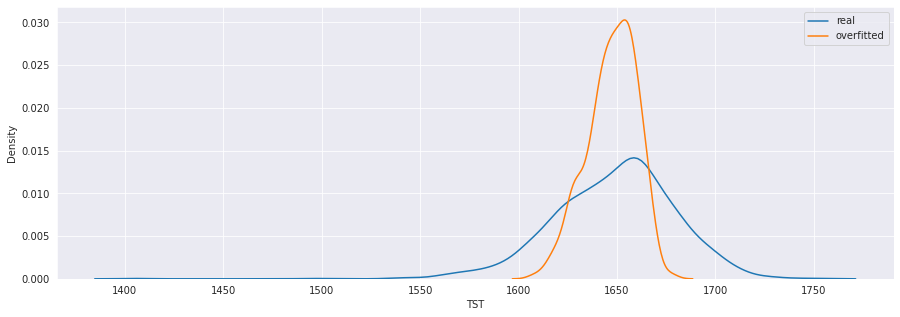

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(data=y_train, x=y_train, label='real')
sns.kdeplot(data=sample_sub, x='TST', label='overfitted')
plt.legend(loc="upper right")
plt.show()

In [ ]:
cols = list(X_t.columns)
cat_cols = list(X_t.select_dtypes(['object', 'category']).columns)
params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE',            
          'l2_leaf_reg': 50,  
          'random_state': 42,
          'cat_features':cat_cols, 
          'verbose':200            
               }

### Углеродный отбор

Отберем признаки для углерода

In [ ]:
estimator = CatBoostRegressor(**params, )
selector = FeatureSelection(estimator, n_features_to_select=20, columns=cols)
X = selector.fit(X_t, y_carbon)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.1021531	test: 0.0926118	best: 0.0926118 (0)	total: 12.6ms	remaining: 12.6s
200:	learn: 0.0647954	test: 0.0560252	best: 0.0560252 (200)	total: 2.07s	remaining: 8.22s
400:	learn: 0.0556800	test: 0.0528268	best: 0.0528268 (400)	total: 4.2s	remaining: 6.28s
600:	learn: 0.0506037	test: 0.0517420	best: 0.0517418 (598)	total: 6.29s	remaining: 4.18s
800:	learn: 0.0473024	test: 0.0513967	best: 0.0513915 (793)	total: 8.39s	remaining: 2.08s
999:	learn: 0.0444584	test: 0.0510508	best: 0.0510436 (990)	total: 10.5s	remaining: 0us

bestTest = 0.05104357549
bestIteration = 990

Shrink model to first 991 iterations.


In [ ]:
X_carbon = selector.transform(X_t)
X_test_carbon = selector.transform(test)

In [ ]:
X_carbon.head()

,plavka_NMZ,VES,sip_VES_VDSYP408,produv_time,plavka_NAPR_ZAD,CO,sip_VES_VDSYP346,POL,0,S,V_y,RAS,plavka_TIPE_GOL,sip_VES_VDSYP171,sip_VES_VDSYP442,T_x,TI,H2,plavka_ST_GOL,N2
NPLV,,,,,,,,,,,,,,,,,,,,
510008,С255,263700.0,14080,1170.0,МНЛЗ,41090.015328,2950,7.070000,76200,0.023,3.846172e+08,965.0,5 сопловая,980,2960,1396.0,0.084,768.501531,11,94893.277851
510009,С255,264500.0,18830,1230.0,МНЛЗ,44161.639846,2930,4.760000,78600,0.017,6.096518e+08,1026.0,5 сопловая,960,0,1419.0,0.096,644.838259,12,167603.328371
510010,Ст3пс/Э,263800.0,16080,1226.0,Изл,41790.572992,2990,4.083052,76300,0.017,4.293470e+08,1029.0,5 сопловая,1050,2960,1384.0,0.110,880.935583,13,109578.402957
510011,Св-08А.z02,264000.0,22150,1058.0,Изл,38422.515437,3620,12.490000,84100,0.018,3.671527e+08,988.0,5 сопловая,980,0,1401.0,0.110,306.418999,14,89712.537841
510012,SC2M/ЭТ,263300.0,19550,1239.0,МНЛС,40544.277759,2930,5.000000,76100,0.018,4.280773e+08,995.0,5 сопловая,1000,3010,1422.0,0.070,1262.575700,15,109741.064986


### TargetEncoding

Аналогично закодируем через TargetEncoding категориальный признак

In [ ]:
X = X_carbon.copy()
X_test = X_test_carbon.copy()

In [ ]:
X_encode = X.sample(frac=0.25)
y_encode = y_carbon.loc[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y_carbon.loc[X_pretrain.index]

In [ ]:
encoder = MEstimateEncoder(cols=['plavka_NMZ'], m=5)
encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain)
X_test  = encoder.transform(X_test)

In [ ]:
cat_features = list(X_train.select_dtypes(include=(['object', 'category'])).columns)

In [ ]:
cat_features

['plavka_NAPR_ZAD', 'plavka_TIPE_GOL', 'plavka_ST_GOL']

### CatBoost

In [ ]:
params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE',            
          'l2_leaf_reg': 50,  
          'random_state': 42,
          'cat_features':cat_features, 
          'verbose':200            
               }

#### Углерод


Получим предсказания

In [ ]:
folds = 5
kfold = KFold(n_splits=folds, random_state=42, shuffle = True)

predictions_valid = np.zeros((X_train.shape[0]))
predictions = np.zeros((X_test.shape[0]))
score = 0

for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
    train_X = X_train.iloc[train_idx]
    valid_X = X_train.iloc[valid_idx]
    train_y = y_train.iloc[train_idx]
    valid_y = y_train.iloc[valid_idx]        

    transformer = QuantileTransformer(n_quantiles=1000, random_state=42)
    transformer.fit(train_y.values.reshape(1, -1).T)


    y = transformer.transform(train_y.values.reshape(1, -1).T)[:,0]
    y_val = transformer.transform(valid_y.values.reshape(1, -1).T)[:,0]


    model = CatBoostRegressor(**params)
    model.fit(train_X, y,
              eval_set = [(valid_X, y_val)],
              early_stopping_rounds = 200,
              verbose = 200
             )

      
    predictions += transformer.inverse_transform(model.predict(X_test).reshape(1, -1).T)[:,0]

    predictions_valid = transformer.inverse_transform(model.predict(valid_X).reshape(1, -1).T)[:,0]
    fold_score = ((valid_y - predictions_valid).abs() < 0.02).mean()
    print(f"Fold {fold} | Metric: {fold_score:.3f}\n")

    score += fold_score / folds
predictions = predictions / folds   
print(f"Overall Metric: {score:.6f}\n")

0:	learn: 0.2882064	test: 0.2883137	best: 0.2883137 (0)	total: 6.03ms	remaining: 6.03s
200:	learn: 0.2256524	test: 0.2521483	best: 0.2521483 (200)	total: 1.06s	remaining: 4.24s
400:	learn: 0.2047486	test: 0.2466525	best: 0.2466110 (399)	total: 2.18s	remaining: 3.26s
600:	learn: 0.1901663	test: 0.2456939	best: 0.2455532 (538)	total: 3.31s	remaining: 2.19s
800:	learn: 0.1777843	test: 0.2453296	best: 0.2452275 (669)	total: 4.43s	remaining: 1.1s
999:	learn: 0.1689942	test: 0.2449291	best: 0.2449291 (999)	total: 5.55s	remaining: 0us

bestTest = 0.2449290549
bestIteration = 999

Fold 0 | Metric: 0.687

0:	learn: 0.2883166	test: 0.2807838	best: 0.2807838 (0)	total: 6.02ms	remaining: 6.02s
200:	learn: 0.2325753	test: 0.2238057	best: 0.2238057 (200)	total: 1.03s	remaining: 4.1s
400:	learn: 0.2115613	test: 0.2127013	best: 0.2127013 (400)	total: 2.15s	remaining: 3.21s
600:	learn: 0.1979211	test: 0.2093230	best: 0.2093230 (600)	total: 3.26s	remaining: 2.17s
800:	learn: 0.1875088	test: 0.2075155	be

In [ ]:
predictions[:5]

array([0.044     , 0.05072567, 0.0582    , 0.05037021, 0.0574    ])

In [ ]:
sample_sub['C'] = predictions

In [ ]:
sample_sub.head()

,NPLV,TST,C
0,512324,1658.204208,0.044000
1,512327,1651.126103,0.050726
2,512328,1656.163160,0.058200
3,512331,1666.535853,0.050370
4,512333,1646.814809,0.057400


Здесь также не улавливаем длинный хвост

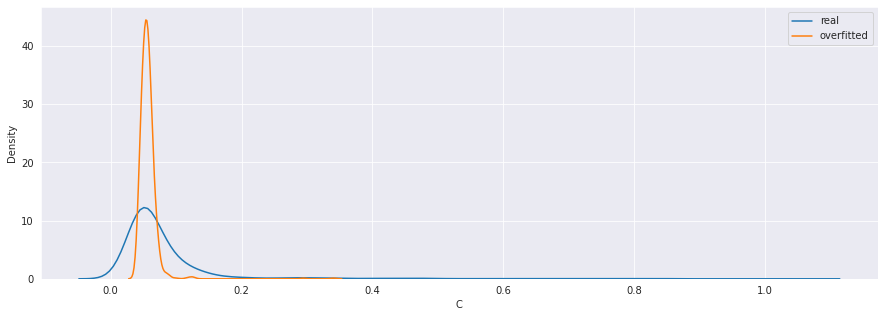

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(data=y_train, x=y_train, label='real')
sns.kdeplot(data=sample_sub, x='C', label='overfitted')
plt.legend(loc="upper right")
plt.show()

### FI

In [ ]:
fi = (pd.DataFrame({'feature': list(X_train.columns), 
                    'importance': model.feature_importances_})
.sort_values(by='importance', ascending=False))

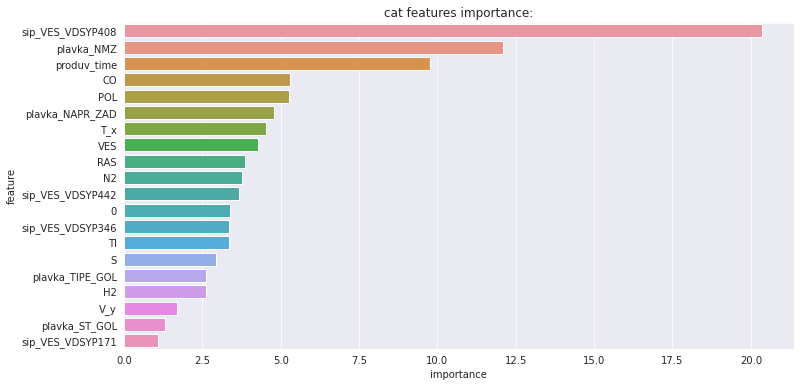

In [ ]:
plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=fi);
plt.title('cat features importance:');

In [ ]:
sample_sub.to_csv('sub.csv', index=False)
files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

## Pipeline

Для ускорения процесса обучения обернем все в функции и классы

### Класс отбора

Два класса на отбор признаков - на Shap и на feature importance модели

In [ ]:
class FeatureSelection (BaseEstimator, TransformerMixin):


  def __init__(self, estimator, n_features_to_select=None, columns=None):
    self.estimator = estimator
    self.n_features_to_select = n_features_to_select
    self.columns = columns

  def fit(self, X, y, **fit_params):
    # разделить выборку на обучение и валидацию
    X_train, self.X_val, y_train, y_val = train_test_split(
                                      X, y, test_size=.25, random_state=42)
    
    assert X_train.shape[0] + self.X_val.shape[0] == X.shape[0], 'Неправильно разделена выборка'
    # обучить модель
    self.estimator.fit(X_train, y_train, eval_set = [(self.X_val, y_val)],
                       early_stopping_rounds = 200
                       , use_best_model=True)

    # получаем предсказание веростности классов
    self.fi = (pd.DataFrame({'feature': list(X_train.columns), 
                    'importance': self.estimator.feature_importances_})
    .sort_values(by='importance', ascending=False))
    self.fi.sort_values(by=['importance'],ascending=False,inplace=True)
    self.idx = list(self.fi['importance'].index)[:self.n_features_to_select]
    # собираем сет данных
   

    return self

  def transform(self, X, y=None):
    X_selected = X.iloc[:, self.idx]
    return X_selected

  def get_index(self):
    return self.idx

In [ ]:
class ShapFeatureSelection (BaseEstimator, TransformerMixin):
  """
  Класс вычисляет  важность признаков на основе библиотеки Shap. Работает 
  только с деревьями для большей эффективности или моделями на основе 
  градиентного бустинга. Приоритетно использовать такие модели как:
   


  Для работы необходимо импортировать:

    from sklearn.base import BaseEstimator, TransformerMixin
    import shap

  Параметры
    ----------
    estimator : 
        Обучение с учителем с методом fit позволит получить и отобрать индексы
        самых важных признаков
    n_features_to_select : int, default=None
        Количество признаков для отбора, по умолчанию значение None
    columns: List, default=None
        Список признаков исходного сета, по умолчанию значение None
    
  Методы
    ----------
    fit - обучается и выявляет наиболее важные признаки
    tranform - изменяет исходный сет и вовзращает отобранные признаки
    get_index - возвращает отобранные признаки индексов
    plot_values - построение графика shap values
    _estimator_type - метод @property - возвращает тип модели
    get_feature_importance - возвращает DataFrame FI
  Примечание
    -----
    Не работает с категориальными признаками. Nan/Inf разрешены в случае, если 
    их принимает модель метода fit

    """

  def __init__(self, estimator, n_features_to_select=None, columns=None):
    self.estimator = estimator
    self.n_features_to_select = n_features_to_select
    self.columns = columns

  def fit(self, X, y, **fit_params):
    # разделить выборку на обучение и валидацию
    X_train, self.X_val, y_train, y_val = train_test_split(
                                      X, y, test_size=.25, random_state=42)
    
    assert X_train.shape[0] + self.X_val.shape[0] == X.shape[0], 'Неправильно разделена выборка'
    # обучить модель
    self.estimator.fit(X_train, y_train, eval_set = [(self.X_val, y_val)],
                       early_stopping_rounds = 200
                       , use_best_model=True)

    # получаем предсказание веростности классов
    preds = self.estimator.predict(self.X_val)
    explainer = shap.TreeExplainer(self.estimator)
    self.shap_values = explainer.shap_values(self.X_val)
    # собираем сет данных
    try:
    
      vals = np.abs(self.shap_values).mean(0)
      self.feature_importance = pd.DataFrame(list(zip(self.columns, vals)),columns=['col_name','feature_importance_vals'])
      self.feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
      self.idx = list(self.feature_importance['feature_importance_vals'].index)[:self.n_features_to_select]
      
    except:
      
      vals = np.abs(self.shap_values[:1]).mean(0)
      self.feature_importance = pd.DataFrame(list(zip(self.columns, vals)),columns=['col_name','feature_importance_vals'])
      self.feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
      self.idx = list(self.feature_importance['feature_importance_vals'].index)[:self.n_features_to_select]

    return self

  def transform(self, X, y=None):
    X_selected = X.iloc[:, self.idx]
    return X_selected

  def get_index(self):
    return self.idx

  def plot_values(self):
    return shap.summary_plot(self.shap_values, self.X_val)

  @property
  def _estimator_type(self):
    return self.estimator._estimator_type

  def get_feature_importance(self):
    return self.feature_importance


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

### Функции

Всю нашу обработку обернем в функции

In [ ]:
def concat_data(produv_train,
                lom_train,
                plavki,
                sip_train,
                chronom_train,
                chugun_train,
                gas_train,
                target_train,
                produv_test,
                lom_test,
                plavki_test,
                chronom_test,
                chugun_test,
                gas_test,
                sip_test):
  

    '''
    Функция вовзращает готовый собранный обучающий сет
    тестовый сет и целевой сет из двух переменных
    '''
    # Подготовка хрономо-сета
    chron = chronom_train[chronom_train['NOP'] =='Продувка']
    cols = ['VR_NACH', 'VR_KON']
    for col in cols: 
      chron[col] = pd.to_datetime(chron[col], format="%Y-%m-%d %H:%M:%S")
    chron['produv_time'] = (chron['VR_KON'] - chron['VR_NACH'])/ np.timedelta64(1, 's')
    chron = chron.drop('O2', axis=1)
    chron['End'] = chron['VR_KON'].dt.floor('Min')
    # Подготовка газа
    end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()
    gas_train['Time'] = pd.to_datetime(gas_train['Time'], format="%Y-%m-%d %H:%M:%S")
    gas_train['Oper'] = gas_train['Time'].dt.floor('Min')
    gas_train = gas_train.reset_index()
    gas_train.merge(end_time, on='NPLV', how='left').head()
    gas_aggregated = end_time.apply(
        lambda x: gas_train[
            np.logical_and(
                gas_train['Oper'] <= x['End'], gas_train['NPLV'] == x['NPLV']
            )
        ].agg(
            {
                'Oper': 'max',
                'NPLV': 'max',
                'V': 'sum',
                'T':'sum',
                'AR':'sum',
                'O2': 'sum',
                'N2': 'sum',
                'H2': 'sum',
                'CO2': 'sum',
                'CO': 'sum',
                'T фурмы 1': 'sum',
                'T фурмы 2': 'sum',
                'O2_pressure': 'sum',
            

            }
        ),
        axis=1,
    ).sort_values(by=['Oper', 'NPLV'])
    gas_aggregated_train = gas_aggregated.drop('Oper', axis=1)

    # Подготовка лома (https://github.com/waico)
    lom_train = lom_train.drop(columns='NML')
    
    lom_train = (pd.pivot(lom_train, index='NPLV', columns='VDL', values='VES')
    .fillna(0).astype(int)
    .add_prefix('lom_VES_VLD'))
    lom_train['lom_components'] = lom_train.apply(lambda x: (x > 0).sum(), axis=1)
    df_lom_train = (lom_train[[x for x in lom_train.columns if x.startswith('lom_VES_VLD')]]
                                              .apply(lambda x: x.sum(), axis=1)
                                              )
    
    # Подготовка плавки
    df_plavki_train = plavki[~plavki.index.duplicated(keep='first')]
    df_plavki_train = df_plavki_train.drop(['plavka_VR_NACH', 'plavka_VR_KON'], axis=1)

    # Подготовка продув
    produv_train['SEC'] = pd.to_datetime(produv_train['SEC'], format="%Y-%m-%d %H:%M:%S")
    produv_train['Oper_sec'] = produv_train['SEC'].dt.floor('Min')
    produv_train = produv_train.reset_index()
    produv_train.merge(end_time, on='NPLV', how='left').head()
    produv_train_aggregated = end_time.apply(
        lambda x: produv_train[
            np.logical_and(
                produv_train['Oper_sec'] <= x['End'], produv_train['NPLV'] == x['NPLV']
            )
        ].agg(
            {
                'Oper_sec': 'max',
                'NPLV': 'max',
                'RAS': 'max',
                'POL':'max',
            

            }
        ),
        axis=1,
    ).sort_values(by=['Oper_sec', 'NPLV'])
    produv_train_aggregated = produv_train_aggregated.drop('Oper_sec', axis=1)
    df_chronom_train = chron.groupby(['NPLV'], as_index=False)['produv_time'].agg('max')
    # Подготовка лома (https://github.com/waico)
    sip_train = sip_train.drop(columns=['NMSYP', 'DAT_OTD'])
    sip_train = sip_train.groupby(['NPLV', 'VDSYP'])['VSSYP'].sum().reset_index()
    df_sip_train = (pd.pivot(sip_train, index='NPLV', columns='VDSYP', values='VSSYP')
    .fillna(0).astype(int)
    .add_prefix('sip_VES_VDSYP')
    )
    # Подготовка чугун
    df_chugun_train = chugun_train.drop('DATA_ZAMERA', axis=1)

    # Подготовка тестовой выборки (этапы аналогичные)

    chron = chronom_test[chronom_test['NOP'] =='Продувка']

    cols = ['VR_NACH', 'VR_KON']
    for col in cols: 
      chron[col] = pd.to_datetime(chron[col], format="%Y-%m-%d %H:%M:%S")
    chron['produv_time'] = (chron['VR_KON'] - chron['VR_NACH'])/ np.timedelta64(1, 's')
    chron = chron.drop('O2', axis=1)
    chron['End'] = chron['VR_KON'].dt.floor('Min')


    end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()
    gas_test['Time'] = pd.to_datetime(gas_test['Time'], format="%Y-%m-%d %H:%M:%S")
    gas_test['Oper'] = gas_test['Time'].dt.floor('Min')
    gas_test = gas_test.reset_index()
    gas_test.merge(end_time, on='NPLV', how='left').head()
    end_time = chron[['NPLV', 'End']].groupby('NPLV', as_index=False)['End'].agg('max').drop_duplicates()
    gas_aggregated = end_time.apply(
        lambda x: gas_test[
            np.logical_and(
                gas_test['Oper'] <= x['End'], gas_test['NPLV'] == x['NPLV']
            )
        ].agg(
            {
                'Oper': 'max',
                'NPLV': 'max',
                'V': 'sum',
                'T':'sum',
                'AR':'sum',
                'O2': 'sum',
                'N2': 'sum',
                'H2': 'sum',
                'CO2': 'sum',
                'CO': 'sum',
                'T фурмы 1': 'sum',
                'T фурмы 2': 'sum',
                'O2_pressure': 'sum',
            

            }
        ),
        axis=1,
    ).sort_values(by=['Oper', 'NPLV'])

    gas_aggregated = gas_aggregated.drop('Oper', axis=1)
    df_chronom_test = chron.groupby(['NPLV'], as_index=False)['produv_time'].agg('max')
    lom_test = lom_test.drop(columns='NML')
    lom_test = (pd.pivot(lom_test, index='NPLV', columns='VDL', values='VES')
    .fillna(0).astype(int)
    .add_prefix('lom_VES_VLD'))
    lom_test['lom_components'] = lom_test.apply(lambda x: (x > 0).sum(), axis=1)

    df_lom_test = (lom_test[[x for x in lom_test.columns if x.startswith('lom_VES_VLD')]]
                                              .apply(lambda x: x.sum(), axis=1)
                                              ).to_frame()
    df_lom_train = df_lom_train.to_frame()
    df_lom_train = df_lom_train[df_lom_test.columns]
    cols = ['plavka_VR_NACH', 'plavka_VR_KON']
    df_plavki_test = plavki_test[~plavki_test.index.duplicated(keep='first')]
    df_plavki_test = df_plavki_test.drop(['plavka_VR_NACH', 'plavka_VR_KON'], axis=1)


    produv_test['SEC'] = pd.to_datetime(produv_test['SEC'], format="%Y-%m-%d %H:%M:%S")
    produv_test['Oper_sec'] = produv_test['SEC'].dt.floor('Min')
    produv_test = produv_test.reset_index()
    produv_test.merge(end_time, on='NPLV', how='left').head()
    produv_test_aggregated = end_time.apply(
        lambda x: produv_test[
            np.logical_and(
                produv_test['Oper_sec'] <= x['End'], produv_test['NPLV'] == x['NPLV']
            )
        ].agg(
            {
                'Oper_sec': 'max',
                'NPLV': 'max',
                'RAS': 'max',
                'POL':'max',
            

            }
        ),
        axis=1,
    ).sort_values(by=['Oper_sec', 'NPLV'])
    produv_test_aggregated = produv_test_aggregated.drop('Oper_sec', axis=1)
    sip_test = sip_test.drop(columns=['NMSYP', 'DAT_OTD'])
    sip_test = sip_test.groupby(['NPLV', 'VDSYP'])['VSSYP'].sum().reset_index()
    df_sip_test = (pd.pivot(sip_test, index='NPLV', columns='VDSYP', values='VSSYP')
    .fillna(0).astype(int)
    .add_prefix('sip_VES_VDSYP')
    )

    df_sip_test = df_sip_test[df_sip_train.columns]
    df_chugun_test = chugun_test.drop('DATA_ZAMERA', axis=1)
   # Объединение сетов для теста и трейна
    test = (df_chronom_test.merge(df_lom_test, on='NPLV', how='left')
            .merge(df_plavki_test, on='NPLV', how='left')
            .merge(produv_test_aggregated, on='NPLV', how='left')
            .merge(df_sip_test, on='NPLV', how='left')
            .merge(df_chugun_test, on='NPLV', how='left')
            .merge(gas_aggregated, on='NPLV', how='left')
            )
    cols = ['plavka_ST_GOL', 
        'plavka_STFUT', 
        'plavka_ST_FURM', 
        'plavka_TIPE_FUR', 
        'plavka_TIPE_GOL']
    test = test.set_index(test['NPLV']).drop(['NPLV'], axis=1)
    for col in cols:
      test[col] = test[col].astype('category')
    # Подготовка теста - признак взят (https://github.com/waico)
    test['VES/O2'] = test['VES'] / test['O2']

    feat = (df_chronom_train.merge(df_lom_train, on='NPLV', how='left')
            .merge(df_plavki_train, on='NPLV', how='left')
            .merge(produv_train_aggregated, on='NPLV', how='left')
            .merge(df_sip_train, on='NPLV', how='left')
            .merge(df_chugun_train, on='NPLV', how='left')
            .merge(gas_aggregated_train, on='NPLV', how='left')
            )

    cols = ['plavka_ST_GOL', 
        'plavka_STFUT', 
        'plavka_ST_FURM', 
        'plavka_TIPE_FUR', 
        'plavka_TIPE_GOL']
    for col in cols:
      feat[col] = feat[col].astype('category')
    # Подготовка обучабщей - признак взят (https://github.com/waico)
    feat['VES/O2'] = feat['VES'] / feat['O2']
    feat = feat.set_index(feat['NPLV']).drop('NPLV', axis=1)

    target_train['C'] = target_train['C'].fillna(target_train['C'].median())

    assert feat.shape[1] == test.shape[1], 'ошибка при сборе сета'
    return feat, test, target_train

def metric(answers, user_csv):
    ''' 
    Метрика качества
    '''
    delta_c = np.abs(np.array(answers['C']) - np.array(user_csv['C']))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers['TST']) - np.array(user_csv['TST']))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers['C'])

    return np.sum(hit_rate_c + hit_rate_t) / 2 / N

def prepared_date(X, test, target_train):
    ''' 
    Подготовка двух целевых признаков
    '''
    X_train = X.merge(target_train, on='NPLV', how='left')
    X_t = X_train.drop(['TST', 'C'], axis=1)
    y_temperature = X_train['TST']
    y_carbon = X_train['C']
    return X_t, y_temperature, y_carbon


def select_and_transform(X_t, y, n_features_to_select):
    ''' 
    Отбор признаков и таргетэнкодинг
    '''
    cols = list(X_t.columns)
    cat_cols = list(X_t.select_dtypes(['object', 'category']).columns)
    params = { 'eval_metric': 'RMSE', 
              'objective': 'RMSE', 
              'eta':0.05,
              'n_estimators': 10000,           
              'l2_leaf_reg': 50,  
              'random_state': 42,
              'cat_features':cat_cols, 
              'verbose':200            
                  }

    estimator = CatBoostRegressor(**params, )
    selector = FeatureSelection(estimator, n_features_to_select=n_features_to_select, columns=cols)
    selector.fit(X_t, y)

    X_temperature = selector.transform(X_t)
    X_test_temperature = selector.transform(test)
    X = X_temperature.copy()
    X_test = X_test_temperature.copy()
    
    X_encode = X.sample(frac=0.25)
    y_encode = y.loc[X_encode.index]
    X_pretrain = X.drop(X_encode.index)
    y_train = y.loc[X_pretrain.index]
    encoder = MEstimateEncoder(cols=['plavka_NMZ'], m=5)
    encoder.fit(X_encode, y_encode)

    X_train = encoder.transform(X_pretrain)
    X_test  = encoder.transform(X_test)
    cat_features = list(X_train.select_dtypes(include=(['object', 'category'])).columns)
    return X_train, X_test, cat_features, y_train

def select_and_transform_SHAP(X_t, y, n_features_to_select):
    ''' 
    Отбор признаков и таргетэнкодинг
    '''
    cols = list(X_t.columns)
    cat_cols = list(X_t.select_dtypes(['object', 'category']).columns)
    params = { 'eval_metric': 'RMSE', 
              'objective': 'RMSE', 
              'eta':0.05,
              'n_estimators': 10000,           
              'l2_leaf_reg': 50,  
              'random_state': 42,
              'cat_features':cat_cols, 
              'verbose':200            
                  }

    estimator = CatBoostRegressor(**params, )
    selector = ShapFeatureSelection(estimator, n_features_to_select=n_features_to_select, columns=cols)
    selector.fit(X_t, y)

    X_temperature = selector.transform(X_t)
    X_test_temperature = selector.transform(test)
    X = X_temperature.copy()
    X_test = X_test_temperature.copy()
    
    X_encode = X.sample(frac=0.25)
    y_encode = y.loc[X_encode.index]
    X_pretrain = X.drop(X_encode.index)
    y_train = y.loc[X_pretrain.index]
    encoder = MEstimateEncoder(cols=['plavka_NMZ'], m=5)
    encoder.fit(X_encode, y_encode)

    X_train = encoder.transform(X_pretrain)
    X_test  = encoder.transform(X_test)
    cat_features = list(X_train.select_dtypes(include=(['object', 'category'])).columns)
    return X_train, X_test, cat_features, y_train


def predict_(X_train, X_test, cat_features, y_train):

    ''' 
    Предсказания. Для углерода нормирование
    '''
    folds = 8
    kfold = KFold(n_splits=folds, random_state=42, shuffle = True)

    predictions_valid = np.zeros((X_train.shape[0]))
    predictions = np.zeros((X_test.shape[0]))
    score = 0
    if y_train.name == 'TST':
      for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
        train_X = X_train.iloc[train_idx]
        valid_X = X_train.iloc[valid_idx]
        train_y = y_train.iloc[train_idx]
        valid_y = y_train.iloc[valid_idx]    

        train_dataset = Pool(data=train_X, label=train_y,
                             cat_features=cat_features)
        eval_dataset = Pool(data=valid_X, label=valid_y,
                            cat_features=cat_features)

        model = CatBoostRegressor(**params)
        model.fit(train_dataset, 
                eval_set = eval_dataset,
                verbose = 200
              )


        predictions += model.predict(X_test) / folds

        predictions_valid = model.predict(valid_X)
        fold_score = ((valid_y - predictions_valid).abs() < 20).mean()
        print(f"Fold {fold} | Metric: {fold_score:.3f}\n")

        score += fold_score / folds
      return predictions
    else:
        for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
          train_X = X_train.iloc[train_idx]
          valid_X = X_train.iloc[valid_idx]
          train_y = y_train.iloc[train_idx]
          valid_y = y_train.iloc[valid_idx]  
          transformer = QuantileTransformer(random_state=42)
          transformer.fit(train_y.values.reshape(1, -1).T)

          y = transformer.transform(train_y.values.reshape(1, -1).T)[:,0]
          y_val = transformer.transform(valid_y.values.reshape(1, -1).T)[:,0]

          model = CatBoostRegressor(**params)
          model.fit(train_X, y, 
                eval_set = (valid_X, y_val),
                verbose = 200
              )


          predictions += transformer.inverse_transform(model.predict(X_test).reshape(1, -1).T)[:,0]

          predictions_valid = transformer.inverse_transform(model.predict(valid_X).reshape(1, -1).T)[:,0]
          fold_score = ((valid_y - predictions_valid).abs() < 0.02).mean()
          print(f"Fold {fold} | Metric: {fold_score:.3f}\n")

          score += fold_score / folds
        predictions = predictions / folds  
    return  predictions


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

### Отработка

### Загрузка сетов

Загрузим сеты, дальше с помощью функций проведем все действия, что делали выше. Получим отдельные предсказания для каждой переменной

In [ ]:
PATH = '/content/data_task1/'

               
sample_sub = pd.read_csv('/content/sample_submission.csv')
produv_train = pd.read_csv(PATH + 'produv_train.csv', index_col=0)
lom_train = pd.read_csv(PATH + 'lom_train.csv')
plavki = pd.read_csv(PATH + 'plavki_train.csv', index_col=0)
sip_train = pd.read_csv(PATH + 'sip_train.csv')
chronom_train = pd.read_csv(PATH + 'chronom_train.csv', index_col=0)
chugun_train = pd.read_csv(PATH + 'chugun_train.csv', index_col=0)
gas_train = pd.read_csv(PATH + 'gas_train.csv', index_col=0)
target_train = pd.read_csv(PATH + 'target_train.csv', index_col=0)
produv_test = pd.read_csv(PATH + 'produv_test.csv', index_col=0)
lom_test = pd.read_csv(PATH + 'lom_test.csv')
plavki_test = pd.read_csv(PATH + 'plavki_test.csv', index_col=0)
chronom_test = pd.read_csv(PATH + 'chronom_test.csv', index_col=0)
chugun_test = pd.read_csv(PATH + 'chugun_test.csv', index_col=0)
gas_test = pd.read_csv(PATH + 'gas_test.csv', index_col=0)
sip_test = pd.read_csv(PATH + 'sip_test.csv')

### Сбор и обработка данных

In [ ]:
features, test, target_train = concat_data(produv_train,
                                            lom_train,
                                            plavki,
                                            sip_train,
                                            chronom_train,
                                            chugun_train,
                                            gas_train,
                                            target_train,
                                            produv_test,
                                            lom_test,
                                            plavki_test,
                                            chronom_test,
                                            chugun_test,
                                            gas_test,
                                            sip_test
                                           )

### Предсказания температуры

In [ ]:
X_t, y_tst, y_c = prepared_date(features, test, target_train)

X_train, X_test, cat_features, y_temperature = select_and_transform_SHAP(X_t, y_tst, 10)

params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE', 
          'eta':0.05,
          'depth': 3,
          'n_estimators': 1500,           
          'l2_leaf_reg': 50,  
          'random_state': 42,
          'verbose':200 ,
          'one_hot_max_size': 15
               }

sample_sub['TST'] = predict_(X_train, X_test, cat_features, y_temperature)

0:	learn: 30.6563183	test: 30.1323345	best: 30.1323345 (0)	total: 12.2ms	remaining: 2m 1s
200:	learn: 24.8115227	test: 25.7428294	best: 25.7428294 (200)	total: 2.16s	remaining: 1m 45s
400:	learn: 21.9777476	test: 25.1199829	best: 25.1140969 (397)	total: 4.37s	remaining: 1m 44s
600:	learn: 20.3036427	test: 24.9324237	best: 24.9267112 (595)	total: 6.58s	remaining: 1m 42s
800:	learn: 18.9943449	test: 24.8170455	best: 24.8170455 (800)	total: 8.81s	remaining: 1m 41s
1000:	learn: 17.6776641	test: 24.7232661	best: 24.7149237 (964)	total: 11s	remaining: 1m 39s
1200:	learn: 16.5815014	test: 24.6813066	best: 24.6772112 (1188)	total: 13.2s	remaining: 1m 36s
1400:	learn: 15.5948799	test: 24.7041538	best: 24.6730522 (1232)	total: 15.4s	remaining: 1m 34s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 24.67305217
bestIteration = 1232

Shrink model to first 1233 iterations.
0:	learn: 29.5965259	test: 32.2945898	best: 32.2945898 (0)	total: 923us	remaining: 1.38s
200:	learn: 24.57259

In [ ]:
X_train.head()

,produv_time,plavka_NAPR_ZAD,H2,plavka_NMZ,T_x,CO,POL,0,sip_VES_VDSYP346,T_y
NPLV,,,,,,,,,,
510008,1170.0,МНЛЗ,768.501531,1661.948690,1396.0,41090.015328,7.070000,76200,2950,1.086623e+06
510009,1230.0,МНЛЗ,644.838259,1661.948690,1419.0,44161.639846,4.760000,78600,2930,1.224648e+06
510010,1226.0,Изл,880.935583,1654.954185,1384.0,41790.572992,4.083052,76300,2990,1.182742e+06
510011,1058.0,Изл,306.418999,1647.984496,1401.0,38422.515437,12.490000,84100,3620,9.548288e+05
510012,1239.0,МНЛС,1262.575700,1638.376055,1422.0,40544.277759,5.000000,76100,2930,1.114291e+06


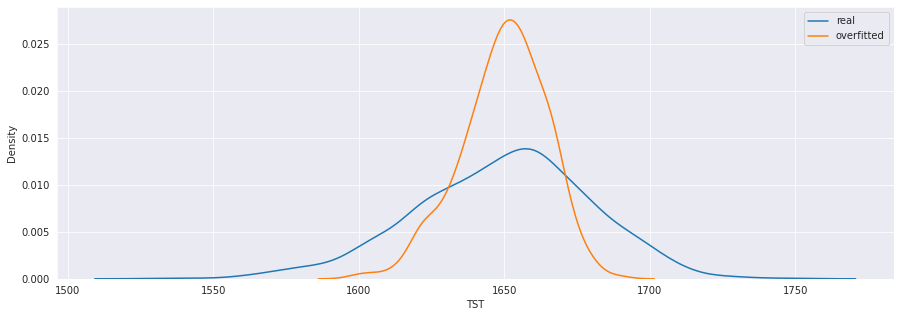

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(data=y_temperature, x=y_temperature, label='real')
sns.kdeplot(data=sample_sub, x='TST', label='overfitted')
plt.legend(loc="upper right")
plt.show()

С хвостами стало лучше

### Предсказание углерода

In [ ]:
X_train, X_test, cat_features, y_carbon = select_and_transform(X_t, y_c, 8)

params = { 'eval_metric': 'RMSE', 
          'objective': 'RMSE', 
          'eta':0.05,
          'depth': 3,
          'n_estimators': 2500,   
          'one_hot_max_size': 30,        
          'l2_leaf_reg': 50,  
          'random_state': 42, 
          'cat_features':cat_features, 
          'verbose':200     
               }

sample_sub['C'] = predict_(X_train, X_test, cat_features, y_carbon)

0:	learn: 0.1017599	test: 0.0922378	best: 0.0922378 (0)	total: 12.9ms	remaining: 2m 9s
200:	learn: 0.0575083	test: 0.0535473	best: 0.0535473 (200)	total: 2.12s	remaining: 1m 43s
400:	learn: 0.0488016	test: 0.0518759	best: 0.0518674 (398)	total: 4.25s	remaining: 1m 41s
600:	learn: 0.0443610	test: 0.0513639	best: 0.0513639 (600)	total: 6.4s	remaining: 1m 40s
800:	learn: 0.0415692	test: 0.0509940	best: 0.0509865 (794)	total: 8.55s	remaining: 1m 38s
1000:	learn: 0.0392425	test: 0.0506928	best: 0.0506577 (950)	total: 10.7s	remaining: 1m 36s
1200:	learn: 0.0375854	test: 0.0503824	best: 0.0503816 (1196)	total: 12.8s	remaining: 1m 34s
1400:	learn: 0.0365473	test: 0.0502637	best: 0.0502637 (1400)	total: 14.9s	remaining: 1m 31s
1600:	learn: 0.0352737	test: 0.0501779	best: 0.0501779 (1600)	total: 17s	remaining: 1m 29s
1800:	learn: 0.0337350	test: 0.0501394	best: 0.0500957 (1767)	total: 19.2s	remaining: 1m 27s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.05009567904
bestIte

In [ ]:
X_train.head()

,plavka_NMZ,VES,sip_VES_VDSYP408,produv_time,plavka_NAPR_ZAD,CO,sip_VES_VDSYP346,POL
NPLV,,,,,,,,
510013,0.071139,263500.0,19130,1179.0,МНЛС,42137.650407,2190,9.00
510014,0.071139,264500.0,21160,1167.0,МНЛС,47549.384963,160,9.33
510016,0.071139,264900.0,19260,1190.0,МНЛС,85308.709535,2130,7.79
510017,0.325017,279200.0,21320,1031.0,МНЛЗ,40265.429420,1350,8.34
510018,0.325017,277000.0,19940,1136.0,МНЛЗ,40712.207192,160,7.48


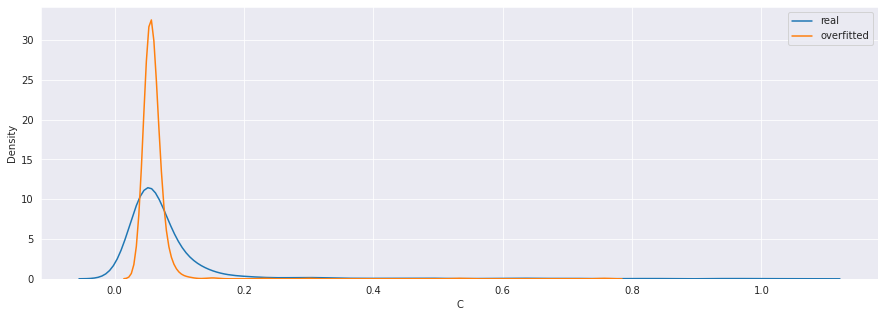

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(data=y_carbon, x=y_carbon, label='real')
sns.kdeplot(data=sample_sub, x='C', label='overfitted')
plt.legend(loc="upper right")
plt.show()

По углероду гораздо лучше стала способность улавливать длинный хвост

### Сабмит

In [ ]:
sample_sub.head()

,NPLV,TST,C
0,512324,1655.027464,0.047197
1,512327,1643.917127,0.061125
2,512328,1656.861948,0.069512
3,512331,1662.529279,0.059434
4,512333,1646.362243,0.063972


In [ ]:
sample_sub.to_csv('sub.csv', index=False)
files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>